<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/02_BreastCancerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls

data.csv  sample_data


In [1]:
import pandas as pd
data = pd.read_csv('data.csv', header=0)
data.head()
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [2]:
data.columns
mySelectedCols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
myData = data.loc[:, mySelectedCols] # names to be provided
#myData = data.iloc[:, :12] # position/ranges of numbers to be provided 
# all input except id and diagnosis 
# input = data.iloc[:, 2:12]
myData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [0]:
#!wget no-check-certificate \
#  https://raw.githubusercontent.com/a-forty-two/cylons/master/data.csv \
#  -O data.csv
  # wget to download public internet content 

In [0]:
# DO I REALLY NEED ALL OF MY DATA IN ORDER TO PREDICT CANCER?

# ARE There more important and less important variables?
# does ID decide whether a cell has cancer or not?

# Is my data usable? 
# column called height -> are all values in inches or some in inch and some in cm, and some in metre?

# GAME THEORY-> Business -> players with profit and loss 
# Players -> You and Me 
# CORRELATION is what happens to you , if something happens to me 

# if me increases, you increases -> good and profitable partnership! -> POS Correlation
# if me increases, you decreases -> adversaries or competition! -> Neg Correlation
# if me increase, you don't care!! -> WHAT WAS 'YOU' doing in the game at all then? -> 0 Correlation 

# how to decide if Me or You would've have won the game?
# KEEP case 1, case 2
# CASE 3-> YOU Don't CARE is useless and SHOULD BE REMOVED 

# WE want to keep POSITIVE and NEGATIVE correlations 
# WE want to drop columns whose correlation with 'OTHERS' is tending to 0 

# CORRELATION shifts ONLY between -1 to +1 -> mathematically easier to understand 
# and use in formula then cov

# 1) THE column or variable or feature should be USELESS (cor->0) wrt every input variable 
# 2)  THE column or variable or feature should be USELESS (cor->0) wrt OUTPUT also


crs = data.corr() # ONLY WORKS for numbers, not STRINGS 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


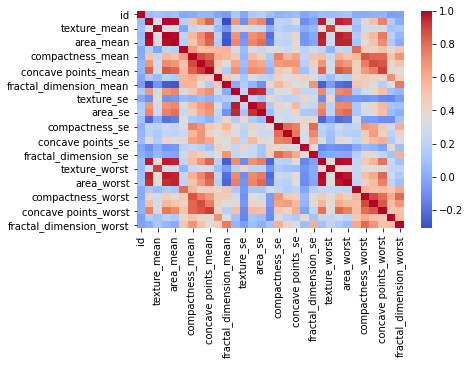

In [5]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

# 2,3 Visualizations functions=> statisitical (pyplot), advanced graphs (seaborn), charts(jS)

# Doctor is new -> 100 medicines for 1 disease
# old doctor -> 1 medicine for 100 diseases 

crs = data.corr()
sns.heatmap(crs, cmap='coolwarm')
# BECAUSE ID feature's ENTIRE ROW and COLUMN is light blue (color for tending to 0),
# it is SAFE to assume that it was not useful for other input variables 

# ANIMAL FARM: All animals are equal, but some animals are more equal than the others


In [0]:
# Diagnosis -> M and B
# ENCODING means converting data from one format to another format 

# We plot our data again, with r.t. our output 
# we should be able to identify what points belonged to M cancers, and which ones to Benign points
# COLOR_ENCODING 
# Malign -> Red, Benign -> Blue 
#

# FUNCTION to read my data, convert m and B into red and blue one by one
# BUT THAT TAKES TIME, even LOOP takes time 
# MAP is a way to 'map the function' to every element pf dataset
# All my temp was in Faren. but I wanted it in Celcius-> ENCODING 
# LAMBDA -> to convert a single Deg F into Deg C 
# then MAP this lambda logic to every element of that temperature column of dataset


diagnosis = data.loc[:,'diagnosis']
encoding_logic = lambda val: 'red' if val=='M' else 'blue'
diagnosis_encoded = diagnosis.map(encoding_logic) # logic will be applied to EVERY element of diagnosis
inputs = data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] ]


#print(len(data[data.diagnosis=='M']))
#print(len(data[data.diagnosis=='B']))


# positive nos. -> left to right
# neg nos. -> right to left 
# why do we use lambda?
# FUNCTIONS -> require jump on thread level 
# thread is hardware allocation to execute a PROCESS 
# JUMPING a thread -> time will be required to make that jump, execute function at it's address
# then return to the place you jumped from 

# lambda input: what_to_return_for_that_input
# lambda x,y: x+Y 

<Figure size 432x288 with 0 Axes>

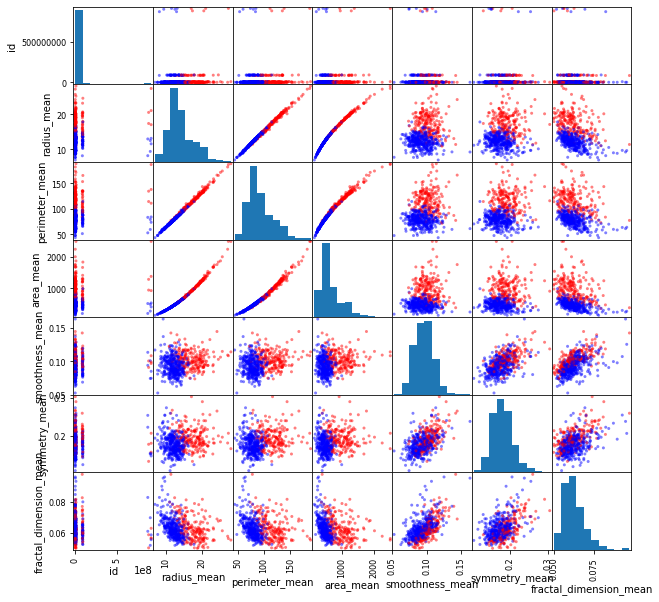

In [11]:
# PLOT inputs but with respect to the OUTPUT plots (M, B)
# size will be different for different machine 
# 1 on my figsize means 72 on my web page 

# OS to interact with hardware -> files or drivers to interact with h/w
# BUFFERS -> keyboard, mouse, monitor 
# print -> print writes to the output buffer
# output buffer is a pointer to SCREEN or PRINTER or PROJECTOR 
# SCANF, System.io.readline, console.read, -> ALL of these are only reading from input buffer

# if there was GARBAGE in input buffer, you will get GARBAGE in variable also 
# KEYLOGGER -> log every user activity in form of keyboard strokes 
# because it is NOT recording your keyboard -> recording your input buffer 

inputs_small = data.loc[:,['id','radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]

plt.figure() # CLEAN the graph buffer before writing anything into it 
sm = pd.plotting.scatter_matrix(inputs_small, c=diagnosis_encoded, figsize=(10,10))
plt.show() # not required in iPython 

# SINCE BOTH GRAPHS are indicating that ID is useless, we can set it to index instead!
# that way, it will not participate as actual data, and not lost either


# BOTH THE SCATTER PLOT AND HEATMAP have demonstrated that ID wAS NOT useful for them!!! 

# How should we handle ID? - we could 've dropped it! 
# For a new ID, we detected Malignant result. if we don't have ID, how do we patient and tell
# them result????




# BUFFERS -> PANDAS, SEABORN, PYPLOT all of them are just trying to write into a BUFFER from
# which graph will be drawn 

# 


# BLACKBOARD -> Plt.figure() -> cleaning that blackboard 
# SEABORN, PANDAS, PLOTLY, PYPLOT -> are people who will pick up chalk and write on this blackboard
# plt.show() -> Whatever is on this blackboard, is shown to the user 

# YOU DON't explicitly link these libraries to MATPLOTLIB 

# ID Columns and Row > lines are parallel to X/Y axises! > NO Correlation! 

# THAT IS WHY plt.figure is critical -> else small chance of working with garbage 

A strong formula indicates a MATHEMATICAL RELATIONSHIP. (Mathematical Induction) 

Between Area and Radius, or perimeter and radius! 

IF THE RELATIONSHIP WAS SO STRONG, that there WAS  a FORMULA, then you DO NOT NEED MACHINE LEARNING 

If there was formulae, we'd rather use that formula!

In [0]:
# IF DATA IS SMALL or PRESENCE of ONLY STRAIGHT LINES-> DO NOT USE MACHINE LEARNING!!!
# A mathematical formula or calulator or excel sheet would have been better!!

# We will use ML BECAUSE there is NO SPECIFIC FORMULA THAT THIS DATA COULD HAVE PROVIDED 
# Formulae to detect CANCER 


In [12]:
inputs.head()
# since ID is useless, but we don't want to lose it either
# we'll set it to index instead
clean_input = inputs.set_index('id')    #, inplace=True)
clean_input.head() # input where INDEX is ID

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [0]:
# SHOULD I USE ALL THESE USEFUL VARIABLES, or COULD i have used better variables 

# What's a good variable and a bad variable 

# I wanted to classify people as TALL or SHORT 
# SOMEBODY collected data, and provided following features for people:
# Height, Favorite Color, City_last_lived, year_born 

# IS THERE A THRESHOLD H in height such that, above that threshold all were TALL, and below
# that threshold all were SHORT, then HEIGHT was a good variable 

# YEAR BORN -> above 1982 is tall, before that short ? NO? BAD VARIABLE!!!! 

# DISTRIBUTION CHECK <- we draw the data distribution and check if M and B were DISTINCTLY
# distributed or if there was some overlap area? 

# THIS OVERLAP AREA IS CONFUSION AREA => this areA cannot be clearly classified as M or B 

# Gaussian Distribution (SCALE 0 to 1 -> NORMAL DISTRIBUTION), Poisson Distribution
# NORMAL means (0 to 90 degrees) or (0 to 1)




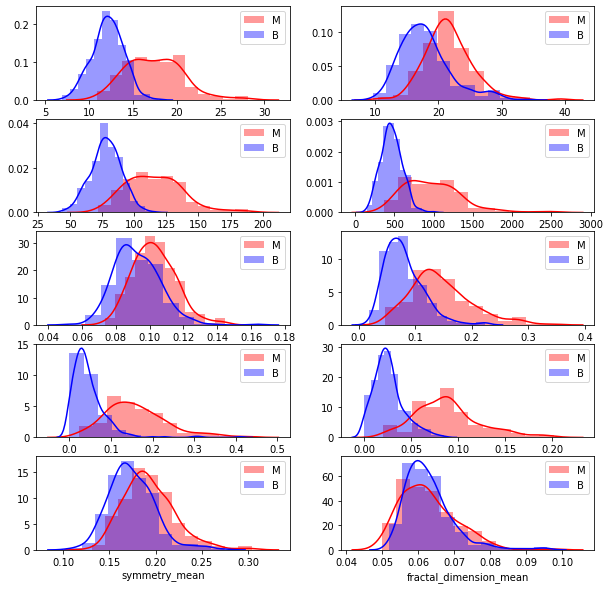

In [13]:
# BAR CHARTS (VALUE) and HISTOGRAMS (FREQUENCY)
# REAL VALUES,   ...... , BINS or INTERVALS 
#inputs_small.set_index('id', inplace=True)
# DON"t CREATE a new dataFrame, make changes to the existing one itself 
# STRINGS, DATA STRUCTURES, CLASSES, DATAFRAMES -> THESE ARE NOT EDITED, instead new 
# of them are created!!! because they are too computationally expensive to edit! 

# TAKING 6 variable ONLY FOR DEMO PURPOSE
# IN REALITY, COMPARE ALL VARIABLES AGAINST ALL VARIABLES 
inputs_small = data.loc[:,['radius_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'symmetry_mean','fractal_dimension_mean'] ]
inputs = inputs.set_index('id')
bins = 12 # relative in nature
plt.figure(figsize=(10,10))
# enumerate([a,b,c]) -> [(0,a),(1,b), (2,c)]
for i, feature in enumerate(inputs.columns):
  rows = 5
  cols = 2
  plt.subplot(rows,cols, i+1 )
  sns.distplot(data[data['diagnosis']=='M'][feature], bins=bins, color='red', label='M')
  sns.distplot(data[data['diagnosis']=='B'][feature], bins=bins, color='blue', label='B')
  plt.legend(loc='upper right')

plt.show()


In [14]:
# WE will do 2 types of ML -> ONE with ALL variables, and ONE with only GOOD VARIABLES

# THEN WE WILL BE ABLE TO OBSERVE IF IT IS ACTUALLY A GOOD IDEA TO DROP VARIABLES AT ALL!!@!

# IF DROPPING VARIABLES GAME ME BETTER SCORING AND EVALUATION -> then it was a good idea, else
# it was a bad idea!!!

# ML is Y = f(x)
# what is X -> [ radius, peri, area..... fractal_dim ]
# ML is Y = f ([ radius, peri, area..... fractal_dim ])
# let's assume that we found an equation such as above
# Y = w1*radius + w2*peri.... w10*fractal_dim + bias 
# NOw let's assume that FRACTAL_DIM is in order of 3-> 10,000 ;45,000 
# SIMILARLY let's assume that Radius was in mm (order of -3) => 0.034, 0.0001 

# THESE SCALES ARE SO FAR AWAY in terms of ORDER and/or SCALE that your entire equation is NOW unbalanced

# FRACTAL_DIM -> since this is a very large no, it will MAJORLY impact the equation
# RADIUS -> since this is a very small no., it may have little to NO impact at all!!!


#THIS MEANS all variables WILL NOT HAVE EQUAL representation in our equation
# HOW DO WE FIX THIS? THEY FOLLOW SAME SCALE OR ORDERING?


# NORMALIZATION -> ENSURES THAT MY DATA COLUMNS scale up/down 
# but become EQUIVALENT or COMPARABLE
# ENTIRE COLUMNS will be READJUSTED 

# WHAT SCALES are POPULAR?

# PROFIT/LOSS problem -> NEGATIVE and POSITIVE numbers will make sense 
# maybe a scale of -1 to +1?

# COLORS -> PIXELS or R,G,B -> RGB is a value usually represented between 0 and 255
# here, negative numbers DO NOT MAKE SENSE 
# maybe a scale of 0 to 1?

# COLORS -> almost always 0 to 1 
# Profit/LOSS -> -inf to +inf 
# Probability -> scale the result into 0 to 1 

# Z-SCORE 
# Z-Score = X-mean/ STD
stats = inputs.describe().T
mu = stats['mean']
sigma = stats['std']
scaled_inputs = (inputs-mu)/sigma 
scaled_inputs.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [0]:
# Now that the data is clean, its a good idea to save it, so that we don't start from scratch!
scaled_inputs.to_csv('scaled_data.csv')
#ALL our input is ready
# in order to do learning, even Y should be all NUMBERS only. Currently it is M and B
# USE LAMBDA to convert M and B into 1 and 0
encoding_logic = lambda value: 1 if value=='M' else 0
y = diagnosis.map(encoding_logic)
y[:20]
x = scaled_inputs
# just variable renaming so that i can represent it as y = f(x)


In [16]:
# BEFORE we begin ML, let's understand the process on a small scale

# LET's ASSUME -> i have to teach you the MULTIPLICATION of 2

# In order to teach you, First I should know the table of 2!!!
# this is my entire dataset

#   X1   x2    Y
#    2    1    2
#    3    2    6
#    2    12   24
#    ............
#    2    4     8

# First I will train you -> hey, 2 ones are 2! 2 twos are 4! ....  2 tens are 20! 
# THEN I will SCORE you (test you) -> what is 32 X 2 = ?

# DURING training -> I will provide you both X and Y 
# then, during Scoring -> I will only provide X, and ask you Y (your predictions)
# then, during Evaluation-> I will check what you predicted is RIGHT or WRONG
# if wrong, then by how much?
# THEN, you will correct YOURSELF, and restart the whole exercise AGAIN 

# we breakdown entire dataset into 2 or 3 sub-datasets 

# if generic problem or plenty of real data -> 2 sub-groups -> training data and testing data (scoring data)
# if gatering real data is challenging or not affordable and you have high chances of 
# overfitting then 3 sub-groups are created-> training data, scoring data, validation data 

# how do i decide how to split my data into training and scoring data?
# - GUIDELINES not RULES 
# 1) TRAINING data > TESTING/SCORING data 
# 2) If i have not trained you something, i cannot test you on it
# if i have only taught you multiplication, then obviously you will answer division wrong!!
# 3) ALL Unique or special cases should be covered in training data itself-> TESTING or SCORING
# should not be an out-of-syllabus surprise test for your algorithms! 
# 70-30, 80-20, 51-49 are acceptable ratios to divide train/scoring data!

# INSTEAD of doing it manually, py provides train_test_split 


# i have to compare multiple algorithms but train_test_split SHUFFLES the data!!!
# that means all algorithms and everytime i run this program -> SHUFFLING will be different!
# this is NOT FAIR because some algorithms may get advantage over the others
# AT ALL TIMES EVERY ALGORITHMS WILL GET SAME RANDOMNESS
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
# except now the seed for randomness is fixed at ANY NUMBER-> shuffling will be random, but always in
# the same way!!! 

print(len(xtrain))
print(len(xtest)) # this should be 20% of len(input)
print(len(ytrain))
print(len(ytest))
# During training -> xtrain, ytrain
# DURING scoring-> ONLY xtest , your algo will return PREDICTIONS
# DUring EVALUATION -> your predictions will be compared against ytest (ACTUAL Answers for xtest)




# YOU HAVE YOUR ENTIRE DATA 
# SOMEONE TO LEARN AND GUESS ON THIS DATA 
# FIRST part => teach the person this data
# your data is divided into INPUT and OUTPUT
# Diagnosis (output), Radius,Smoot...Frac_dim (input)
# Diagnosis = f(Radius,Smoot...Frac_dim )
# Sample Inputs (XTRAIN) and THeir Sample Outputs (YTRAIN)
# THIS HELPS model create an equation that satisfies this f(X)
# now how do you know that this f(x) is going to hold true everywhere?
# TESTING/SCORING
# NOw you'll give some unknown data (XTEST) to this model (FOR WHICH YOU ALREADY KNOW THE ANSWER- YTEST)
# MODEL WILL THEN MAKE GUESSES ON THIS UNKNOWN DATA and give you some predictions
# if these predictions were close to the ACTUAL Answer, then your model was good
# if they are too far away, you need to improve your model 




455
114
455
114


In [17]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
859471,-1.446714,-0.455622,-1.365450,-1.149113,0.728073,0.699812,2.812359,-0.133216,1.092064,2.501626
873593,1.975770,1.692697,2.087782,1.864406,1.261345,3.386663,2.005784,2.594677,2.128020,1.583827
859196,-1.405852,-1.262405,-1.348576,-1.119560,-1.361640,-0.318692,-0.362762,-0.698896,1.931042,0.967711
88466802,-0.986732,1.378819,-0.986010,-0.874898,0.014912,-0.605933,-0.815473,-0.844504,0.311449,0.069740
858970,-1.122939,-1.025253,-1.128403,-0.974639,1.211573,-0.449342,-0.977916,-0.928260,3.397431,0.963462


In [28]:
# Let's apply our first 2 algorithms for comparison-> Stochastic Gradient Descent, SVC and LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

time_all = [] # we don't want a SLOW algorithms
acc_all = [] # we want correct number of guesses
# Accuracy = Correct Guesses/ Total Guesses 
# SGD
time_error = 1.9788742065429688e-05
starttime = time.time()
model = SGDClassifier()
# FIRST STEP is TRAINING-> PROVIDE it all training Input and it's OUTPUT 
model.fit(xtrain, ytrain)
# SECOND STEP is SCORING/TESTING -> PROVIDE it all TESTING input but NOT output
# we are expecting the model to give us predictions for comparison
predictions = model.predict(xtest)
endtime = time.time()
# THIRD STEP is EVALUATE the model -> compare the prediction to answer that yOu already know!
accr = accuracy_score(predictions, ytest)

timetaken  = endtime - starttime - time_error
print('Time taken by Stochastic Gradient Descent is: ' + str(timetaken))
print('Accuracy of Stochastic Gradient Descent is: ' + str(accr))
# FIRST RUN BLANK TIME-> to find out how much time does empty process take

# PROBABILISTIC algos -> will give you a diff output every time-> SGD, DT, RF
# EMPIRICAL algos -> will give you SAME output everytime because they are dependent on GRAPH
# GRAPH cannot be changed at will- same points will always lead to the same boundary
# Lin reg, SVMs 


Time taken by Stochastic Gradient Descent is: 0.004596710205078125
Accuracy of Stochastic Gradient Descent is: 0.9385964912280702


In [29]:
predictions
# We have given this model only XTEST -> based on xtest, it has made some predictions
# y = f(radius, smooth, area .. fractdim)
# y -> 0 or 1 
# 0 for 1st row of data, 1 for 2nd row of data and so on 

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [31]:
ytest.to_numpy()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [41]:
# 4 algos- 2 graph based, 1 Gradient Descent based, 1 probability based
# Bayes' theorem -> P(B<-A) 
import numpy as np
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
# I need some METRICS from which i could compare these 3 algorithms and select which was better or worse
import time 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# CROSS VALIDATION SCORE
# I have 20 people sitting in a class room -> I applied various algos, and found out
# that favorite color of class was BLUE (70% accuracy)[ASSUMING]

# if i make such a strong statement, then this STATEMENT should hold true for at least majority
# of my data (if not all of it!)

# Best way to check this-> divide your class into sub groups 
# and now ask favorite colors of those sub-groups instead 
# Blue-Red-Blue-Blue-Blue-Red-Red-Red-Green_blue_green_green -> BLUE
# BLue-Red-Blue -> blue, Blue-Blue-Red-> blue, Red-Red-Green-> red, B,G,G-> G
# BLUE, BLUE, GREEN , GREEN
# THAT our ML had become BIASED in favor of BLUE just because blue was in majority and arranged that way
# OVERFITTING -> your answer is bit too perfect 
# ML is not meant to be perfect -> Perfect answer means something's fishy
# CROSS Val Score is accuracy on SUB-SET(s) of dataset 

# CROSS-VALIDATION 
 



algos = {'RFPlain': RandomForestClassifier(),'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200), 'Dtree':DecisionTreeClassifier(),'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 'Sherlock':GaussianNB()}
# all algos that I want to compare 

time_all = [] 
acc_all = []
cvs_all = []
time_error = 1.9788742065429688e-05


for name,algo in algos.items():
  print('Starting algo: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  cv_score = cross_val_score(model,x, y, cv=5 ) # no. of cross validations 
  # Chemistry -> Titration-> burettes and pippetes-> you did each experiment at least 3 times
  # mg of Na in Na2So4 -> conducted a heat/flame exp and a titration
  # you repeat exp at least 2 more times -> 2.3 mg of NA 
  # [2.3, 2.4, 2.313] -> from various results, you will calulate AVERAGE of experiement 
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  print('CVS of '+ name +' is: ' )
  print(cv_score)
  time_all.append(timetaken)
  acc_all.append(accur)
  cvs_all.append(np.mean(cv_score))
# when your is too less -> your algorithm will tend to OVERFIT
# one CRITICAL (FIRST and MANDATORILY FIRST) way of fixing overfitting -> INCREASE your data 


Starting algo: RFPlain
Time taken by RFPlain is: 0.1889355182647705
Accuracy of RFPlain is: 0.9473684210526315
CVS of RFPlain is: 
[0.90350877 0.93859649 0.94736842 0.97368421 0.95575221]
Starting algo: RF5
Time taken by RF5 is: 0.011356353759765625
Accuracy of RF5 is: 0.9736842105263158
CVS of RF5 is: 
[0.92105263 0.9122807  0.96491228 0.98245614 0.92920354]
Starting algo: RF200
Time taken by RF200 is: 0.3547801971435547
Accuracy of RF200 is: 0.9473684210526315
CVS of RF200 is: 
[0.90350877 0.94736842 0.94736842 0.97368421 0.94690265]
Starting algo: Dtree
Time taken by Dtree is: 0.004108905792236328
Accuracy of Dtree is: 0.9385964912280702
CVS of Dtree is: 
[0.87719298 0.92105263 0.89473684 0.93859649 0.9380531 ]
Starting algo: SGD
Time taken by SGD is: 0.003831148147583008
Accuracy of SGD is: 0.9385964912280702
CVS of SGD is: 
[0.85964912 0.95614035 0.94736842 0.94736842 0.87610619]
Starting algo: LinearSVC
Time taken by LinearSVC is: 0.010826826095581055
Accuracy of LinearSVC is: 0.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
print(cvs_all)
print(acc_all)
# Less overfitting, VERY high overfitting, Less overfitting, HIGH, HIGH, 

# As per overfitting, LinearSVC seems best
# but as per accuracy, SVC sounds best

# WHY DID I NOT CONSIDER TIME- in human perspective- can i diff between 0.01 and 0.0001 second?
# if not, then why fuss about it? 
# if this was seconds, YES, we would consider time also! 
# THERE CANNOT BE one particular preference, but rather a compromise between multiple
# performance metrics! 

# PICK multiple algos that are above your min criteria 
# over a period of time, they might outperform each other
# typically try 10-20 algos, pick top 3-5 best algos based on various metrics 
# use them-< only then you will come to know in reality which algos were better 


[0.9437820214252446, 0.9419810588417947, 0.943766495885732, 0.9139264089427108, 0.9173265020959478, 0.9332091290172334, 0.9367179009470579, 0.9138953578636858]
[0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9385964912280702]


In [0]:
# Hypothesis is that FOrce is impacted by Mass and Acceleration
# I will have to collect Data and Mathmatically prove that above holds true
# THIS IS CALLED HYPOTHESIS testing
# if hypothesis is validated= we call it a FACT
# if hypothesis fails we call it a LIE 

We will deep dive into ML algos -> EVALUATE our algorithms 

Data Engineering -> how to collect, manage and store the data (IoT, BigData, Analysis and other stages and tools)-> WorkFlow, architecture and BIG picture 

(LAB for data engineering will be in week 3) 